# 1. Data Generation(Preparation)

In [ ]:
X = list(range(10))
Y = [ 1, 1, 2, 4, 5, 7, 8, 9, 9, 10 ]

print(len(Y))
print(len(X))

10
10


## Matplotlib

`import matplotlib.pyplot as plt` <br>
* matplotlib 이 큰 library 인데, 그냥 import 하면 필요하지 않은 기능들도 RAM 에 올라가게 되기 때문에 matplotlib.pyplot 이라는 모듈만을 import 해준다

* `as plt`는 이제부터 plt로 칭해서 호출하겠는 의미


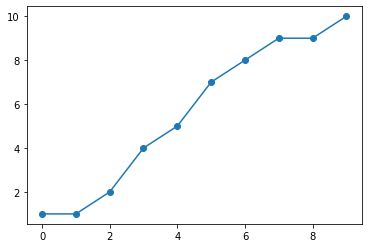

In [ ]:
import matplotlib.pyplot as plt

# plt 특성 상 겹쳐서 그려진다. 
plt.plot(X, Y)
plt.scatter(X, Y)

https://matplotlib.org/stable/gallery/index.html
<br> 여기 사이트를 보면 python matplotlib 패키지로 시각화할 수 있는 그래프가 있음

# 2. Hypothesis Define (Model Define)

* Linear Regression시에 활용되는 간단한 모델 f(x) = Wx 라는 모델을 구현

In [ ]:
# hypothesis 정의
class H():

  def __init__(self, w):
  # 초기에 모델의 parameter 값인 w를 인풋으로 받는다
  # w는 학습을 통해서 최적화될 값이다
    self.w = w
  
  def forward(self, x): 
  # 샘플 x가 input으로 들어올 때 모델의 output 값인 y를 return
    return self.w * x


# w = 4인 f(x) 모델이 생성됨 --> f(x) = 4x
h = H(4)

# 3. Cost Function Define (Loss Function Define)

In [ ]:
def cost(h, X, Y):
  error = 0
  # MSE(Mean Squared Error)
  for i in range(len(X)):
    error += (h.forward(X[i]) - Y[i])** 2
  error = error / len(X)
  return error

cost(h, X, Y)

# w = 4인 경우 cost가 222.2(성능이 좋지 않음)

222.2

### Cost Function 수정

* 위에 있는 cost(h, X, Y) 에서는 cost function 안에서 H(x) 를 계산해야 하는 불편함이 존재
* cost function에 모델이 예측한 y값들의 리스트와 실제 y 값들의 리스트를 넣어서 계산하는 구조로 수정

In [ ]:
def better_cost(pred_y, true_y):
  error = 0
  for i in range(len(X)):
    error += (pred_y[i] - true_y[i])** 2
  error = error / len(X)
  return error

# 미리 모델 h를 통해서 각 x 값에 대한 y 값을 리스트화
pred_y = [ h.forward(X[i]) for i in range(len(X)) ]
print(better_cost(pred_y, Y))

222.2


In [ ]:
list_w = []
list_c = []

# 200개의 hypothesis를 검사
for i in range(-100, 100): 
  w = i * 0.1 # -10 ~ 10
  h = H(w)
  c = cost(h, X, Y)
  list_w.append(w)
  list_c.append(c)

print(list_w)
print(list_c) # 감소하다가 특정 지점에서 다시 증가

[-10.0, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.5, -9.4, -9.3, -9.200000000000001, -9.1, -9.0, -8.9, -8.8, -8.700000000000001, -8.6, -8.5, -8.4, -8.3, -8.200000000000001, -8.1, -8.0, -7.9, -7.800000000000001, -7.7, -7.6000000000000005, -7.5, -7.4, -7.300000000000001, -7.2, -7.1000000000000005, -7.0, -6.9, -6.800000000000001, -6.7, -6.6000000000000005, -6.5, -6.4, -6.300000000000001, -6.2, -6.1000000000000005, -6.0, -5.9, -5.800000000000001, -5.7, -5.6000000000000005, -5.5, -5.4, -5.300000000000001, -5.2, -5.1000000000000005, -5.0, -4.9, -4.800000000000001, -4.7, -4.6000000000000005, -4.5, -4.4, -4.3, -4.2, -4.1000000000000005, -4.0, -3.9000000000000004, -3.8000000000000003, -3.7, -3.6, -3.5, -3.4000000000000004, -3.3000000000000003, -3.2, -3.1, -3.0, -2.9000000000000004, -2.8000000000000003, -2.7, -2.6, -2.5, -2.4000000000000004, -2.3000000000000003, -2.2, -2.1, -2.0, -1.9000000000000001, -1.8, -1.7000000000000002, -1.6, -1.5, -1.4000000000000001, -1.3, -1.20000000000000

## Cost Surface Visualization
* w에 따른 cost의 값을 시각화
* 위의 리스트를 보면 알다시피, 그래프에서도 cost 값이 감소하다가 특정 지점에서 cost 값의 최저를 찍고 다시 증가하는 양상을 보인다

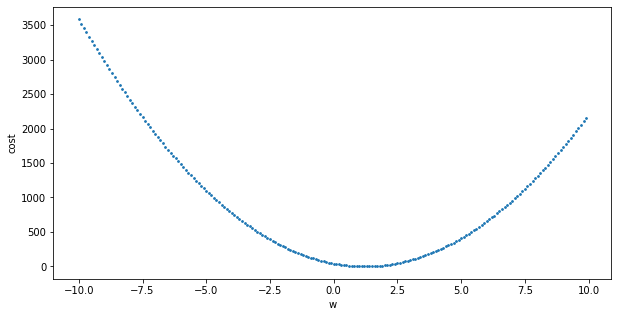

In [ ]:
# w에 따른 cost값을 시각화
plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

## 4. Gradient Descent Algorithm

1. **수치해석적인 방법** <br>
▶ `w = 4`인 지점과 `w= 4 + eps` 인 지점에서의 cost 값을 각각 구한 뒤, 두 값의 차이를 통해서 gradient 를 구하는 방식 <br>
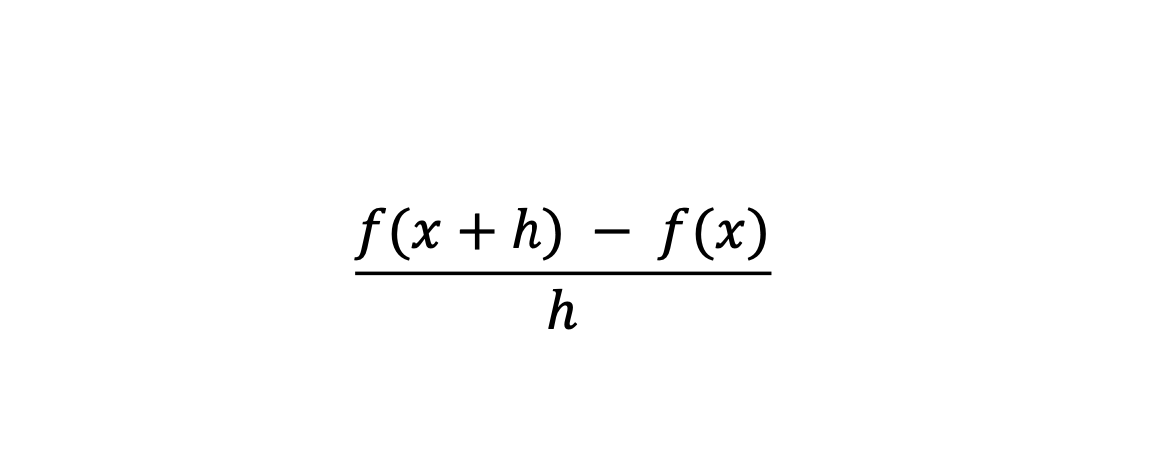

In [ ]:
# 1. 수치해석적인 방법
def cal_grad(w, cost):
  h = H(w)
  cost1 = cost(h, X, Y)

  eps = 0.01
  h = H(w+eps)
  cost2 = cost(h, X, Y)

  dcost = cost2 - cost1
  dw = eps
  grad = dcost / dw
  return grad, (cost1+cost2)*0.5

# lr = learning rate
w = 4
lr = 0.01

# w = 4일 때, grad = 159.02.. 
# 기울기가 커질수록 cost 값도 커지기 때문에 w의 값을 줄여줘야한다.
print(cal_grad(4, cost))
print()

# 10번 학습시켜줌
for i in range(10):
  grad, mean_cost = cal_grad(w, cost)
  w -= lr * grad
  print(w, mean_cost)

(159.284999999997, 222.996425)

2.40715000000003 222.996425
1.7222245000000314 41.58868974125204
1.427706535000012 8.04639949190805
1.3010638100500047 1.8444300248037795
1.246607438321502 0.6976858703362163
1.223191198478246 0.4856528761751665
1.2131222153456458 0.4464479755547882
1.2087925525986276 0.43919898943008034
1.20693079761741 0.4378586518956218
1.2061302429754863 0.4376108234855005


2. **gradient 공식을 통해서 gradient 를 한번에 구하는 방식** <br>
▶ w로 편미분한 공식에 바로 대입하여 gradient 를 근사하는 방법<br>

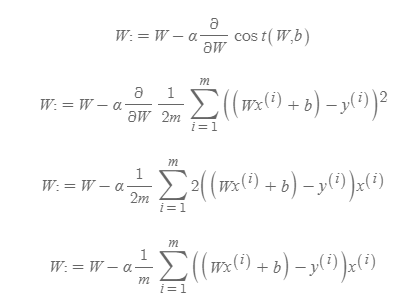

In [ ]:
def cal_grad2(w, cost):
  h = H(w)
  grad = 0
  for i in range(len(X)):
    grad += (h.forward(X[i]) - Y[i]) * X[i]
  grad = grad / len(X)
  c = cost(h, X, Y)
  return grad, c

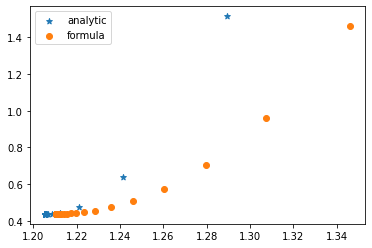

In [ ]:
w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
  grad, mean_cost = cal_grad(w1, cost)
  grad2, mean_cost2 = cal_grad2(w2, cost)

  w1 -= lr * grad
  w2 -= lr * grad2
  list_w1.append(w1)
  list_w2.append(w2)
  list_c1.append(mean_cost)
  list_c2.append(mean_cost2)
  # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

### Compare Training process of Two Models Initialized from Different w value

* 편미분 공식을 활용해서 Gradient Descent 진행
* w가 서로 다른 지점으로 초기화 되었을 때의 양상 확인

1.2105263157894741 0.43684210526315786 1.2105263157894735 0.4368421052631577


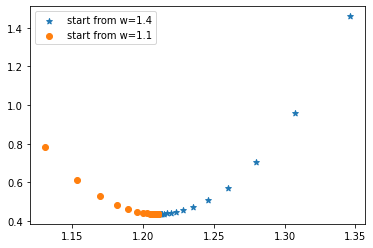

In [ ]:
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 반복문을 통한 100번의 학습
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # 학습이 끝난 뒤 w1 과 w2 모두 1.21.. 정도의 값으로 수렴함
  
# 서로 다른 지점으로부터 시작하였더라도 학습이 진행됨에 따라 둘 다 같은 파라미터(w=1.21)로 수렴하는 양상을 확인할 수 있음
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()